# Exercise # 2  Spectral Analysis of LFP and EEG 

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
##THIS IS NEW
from scipy.fftpack import fft, ifft  #THIS IS THE NEW FUNCTION!
from hdf5storage import loadmat 


In [2]:
def sinusoid(f,t,A = 1,theta = 0):
    ''' makes a sinusoid of given frequency (f) at the time points given in t. 
    Amplitude (A) and phase (theta) can be optionally specified.  Phase is given in degrees not radians'''
    theta = theta*np.pi/180 #convert theta from degrees to radians
    e = A*np.cos(2*np.pi*f*t+theta)
    return e

### Problem #1

##### Write a script to evaluate the dot product between two sinusoids as the frequency of one of the sinusoids is being changed.   

#### (a) Assume the sampling rate is 100 Hz and the interval is 1 sec one of the frequencies is 5 Hz and the other frequency changes from 3 to 7 in steps of 0.1. Make a plot of the difference in frequency (from -2 to 2 Hz verus the value of the dot product)     

#### (b) Run the code above for T = 1,2,5 and make labeled plots 

#### (c) Create a markdown box to write down what you think you see here.  

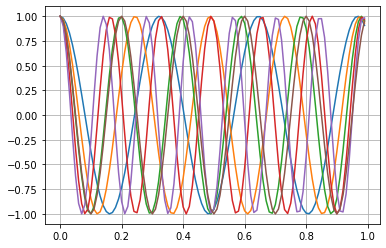

0.026873787281916476


In [9]:

samplingrate = 100 # this is the rate at which the signal is sampled. 
ts = 1/samplingrate #  this is the interval in time between samples.  interval in time
t = np.arange(0,1,ts) #this is the time time vector with 1 value of time for each sample.  
es = dict()


xs = (x + 0.1 for x in range(3, 8))
for x in xs:
    es[0] = sinusoid(x,t)
    plt.plot(t,es[0])
es[1] = sinusoid(5,t)
plt.plot(t,es[1])
plt.grid()
plt.show()

nsamp = np.size(t)
dp = np.sum(es[0]*es[1])/nsamp
print(dp) 
   


In [4]:
samplingrate = 100 # this is the rate at which the signal is sampled. 
ts = 1/samplingrate #  this is the interval in time between samples.  interval in time
t_v = np.array([1,2,5])
#t = np.arange(0,t_v,ts) #this is the time time vector with 1 value of time for each sample.  
es = dict()

for x in t_v:
    t = np.arange(0,t_v,ts) #this is the time time vector with 1 value of time for each sample.  




xs = (x + 0.1 for x in range(3, 8))
for x in xs:
    for 
    es[0] = sinusoid(x,t)
    plt.plot(t,es[0])
es[1] = sinusoid(5,t)
plt.plot(t,es[1])
plt.grid()
plt.show()

nsamp = np.size(t)
dp = np.sum(es[0]*es[1])/nsamp
print(dp) 

#create subplot for differnt T 



SyntaxError: invalid syntax (963699034.py, line 15)

### Problem #2 

#### I want you to use the FFT algorithm to investigate the amplitudes of the frequency content of a Local Field Potential (LFP) signal recorded from the rat hippocampus, by visualizing it and averaging the amplitudes. 

#### This dataset comes from an openly accessible neuroscience database. For more information on this particular dataset, see [here](https://crcns.org/data-sets/hc/hc-2/about-hc-2).

#### You will notice that the LFP signal has a very prominent rhythmic component, with peaks near, for example, 0.25, 0.37, and 0.5 seconds. Therefore, it has a **periodicity of about 0.125 seconds**, or a **frequency of 8Hz**. This is a very famous brain oscillation, called the theta oscillation which is central to memory functions. 

#### (a) Use the FFT examples as a guide on how to compute and visualize the amplitude spectrum.  Compute the amplitude spectrum of the segment of the data plotted below (lfp_short).

#### (b) Visualize the amplitude on a linear and on a logarithmic scale. You can do this by take the log of the amplitude, but you can also do it by choosing a logarithmic scale when you call plot. 

#### (c) Make a loop to segment 10 consecutive epochs from the LFP file, and compute the amplitude of each epoch and plot them all on the same graph. 

#### (d) Extend your loop to compute the average amplitude spectrum of a set of m epochs. Make a graph that shows the average amplitude spectrum of the first m = 10, m = 20, and m = 40 epochs.  


dict_keys(['__header__', '__version__', '__globals__', 'lfp', 'fs', 'spike_indices', 'spike_fs'])


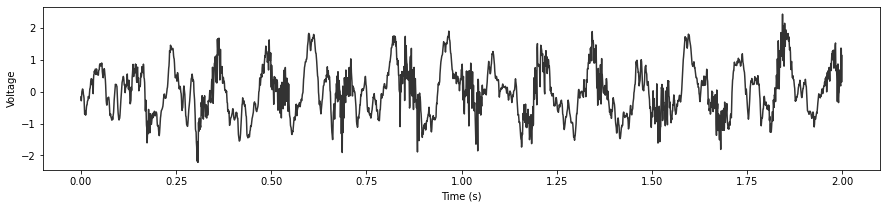

In [10]:
data = loadmat('data/LFP.mat', squeeze_me=True)
print(data.keys())

# unpack the variables
fs = data['fs'] # sampling rate 
deltaT = 1/fs # time steps

lfp = data['lfp'][0,:]/1000 # this file contains two channels, we'll only work with the first one
lfp_short = lfp[:int(2*fs)] # make a variable that has only the first two seconds of the LFP
t_short = np.arange(0, len(lfp_short)*deltaT, deltaT) # create the corresponding time vector

plt.figure(figsize=(15,3))
plt.plot(t_short,lfp_short, 'k', alpha=0.8)
plt.xlabel('Time (s)');plt.ylabel('Voltage');
plt.show()

[-5.12107717e-14-0.00000000e+00j  1.20138624e-14-2.86427306e-14j
  2.12942591e-15-2.82150999e-14j  1.60002038e-14-3.84957871e-14j
  7.93846399e-14+2.69302002e-14j  1.33036096e-14+4.04416399e-14j
  3.12122232e-14-2.29912498e-15j  2.48557015e-14+5.40036184e-14j
 -4.71917377e-14-2.13008742e-14j  3.45498898e-14-2.62092135e-14j
  4.83023771e-14+1.77687088e-14j -4.00687480e-14-1.14035959e-14j
  6.42269059e-14-2.20698397e-14j  4.89733277e-14+5.07198560e-15j
  7.02656934e-14+1.64298969e-15j  2.24463748e-13+2.63674044e-14j
  1.25000000e+03+6.03336470e-13j -1.42584467e-13+2.10943193e-14j
 -8.05940598e-14+4.08884300e-14j -8.00416706e-14+7.43523136e-15j]


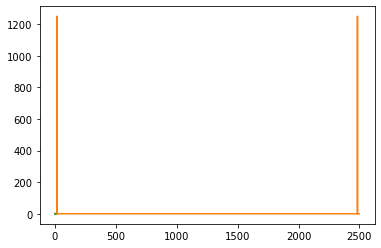

In [28]:
se = dict()
se[1]= sinusoid(8,t_short)
plt.plot(t_short,se[1])
xf = fft(se[1])# fast fuorier (can also be from np)make sure to import it from numpy if we want to use it 
print(xf[0:20])
amplitude = np.abs(xf) # making an amplituder (absoulte value of xf)
plt.plot(amplitude)
plt.plot(amplitude[0:11]) 